In [24]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

import networkx as nx

import plotly.offline as py
import plotly.graph_objs as go
import networkx as nx
import matplotlib.pyplot as plt

import os

In [25]:
df = pd.read_csv("./data/21/expc.csv", encoding='utf-8')
bycode = pd.read_excel(r'data/bycode2018.xlsx', encoding='utf-8')

locations = df['שם ישוב']
print(locations)
sizes = df['מצביעים']
print(sizes)

0        אבו גווייעד שבט
1                אבו גוש
2               אבו סנאן
3          אבו עבדון שבט
4        אבו קורינאת שבט
              ...       
1209               תקומה
1210                תקוע
1211    תראבין אצאנע שבט
1212    תראבין אצאנעישוב
1213                תרום
Name: שם ישוב, Length: 1214, dtype: object
0        595
1       2718
2       6090
3         41
4       1336
        ... 
1209     416
1210    1619
1211      48
1212     206
1213     472
Name: מצביעים, Length: 1214, dtype: int64


In [26]:
normalized_df = df.drop(['סמל ועדה', 'בזב', 'Unnamed: 37', 'פסולים', 'כשרים', 'מצביעים', 'שם ישוב', 'סמל ישוב'], axis=1)

normalized_df = normalized_df[normalized_df.sum().sort_values(ascending=False).index]
normalized_df = normalized_df.truediv(normalized_df.sum(axis=1), axis=0)
normalized_df

,מחל,פה,ודעם,שס,ג,אמת,ל,טב,נץ,ז,...,כ,קי,יק,ני,יז,י,יר,יף,זך,זץ
0,0.006791,0.013582,0.940577,0.003396,0.000000,0.022071,0.001698,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.001698,0.000000,0.000000,0.000000,0.000000,0.0
1,0.104400,0.045861,0.804251,0.005220,0.001491,0.027964,0.001864,0.001864,0.001119,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000373,0.000373,0.000000,0.0
2,0.031473,0.124565,0.738446,0.040914,0.000994,0.015239,0.038098,0.002650,0.000497,0.000000,...,0.000166,0.000166,0.0,0.000166,0.000331,0.000166,0.000166,0.000331,0.000166,0.0
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.006024,0.024849,0.951054,0.000000,0.000000,0.006777,0.000000,0.000753,0.000753,0.000000,...,0.000000,0.000000,0.0,0.001506,0.000000,0.000000,0.000753,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,0.388889,0.152174,0.000000,0.028986,0.012077,0.012077,0.002415,0.393720,0.004831,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1210,0.360991,0.052632,0.001858,0.021053,0.020433,0.017337,0.021672,0.470588,0.017957,0.004334,...,0.003096,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1211,0.000000,0.083333,0.895833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.0
1212,0.194175,0.009709,0.776699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [27]:
df

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
0,18,אבו גווייעד שבט,967,2018,595,6,589,13,0,554,...,0,8,2,0,0,0,0,2,2,NaN
1,2,אבו גוש,472,4821,2718,36,2682,75,4,2157,...,2,123,0,2,0,0,1,4,14,NaN
2,6,אבו סנאן,473,9422,6090,53,6037,92,6,4458,...,3,752,0,2,2,1,2,4,247,NaN
3,18,אבו עבדון שבט,958,142,41,1,40,0,0,40,...,0,0,0,0,0,0,0,0,0,NaN
4,18,אבו קורינאת שבט,968,3037,1336,8,1328,9,0,1263,...,0,33,0,2,1,0,2,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,18,תקומה,665,488,416,2,414,5,5,0,...,1,63,0,0,0,0,0,0,12,NaN
1210,2,תקוע,3563,2158,1619,4,1615,28,33,3,...,0,85,2,0,1,0,2,5,34,NaN
1211,18,תראבין אצאנע שבט,970,520,48,0,48,0,0,43,...,0,4,0,0,0,0,0,0,0,NaN
1212,18,תראבין אצאנעישוב,1346,587,206,0,206,0,0,160,...,0,2,1,0,1,0,0,0,0,NaN


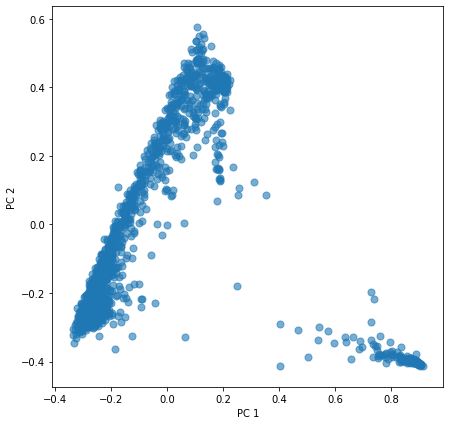

In [28]:
normalized_df = normalized_df.fillna(0)
plt.figure(figsize=(7, 7))
pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(normalized_df))
pca_df['locations'] = locations
pca_df['sizes'] = sizes

plt.scatter(pca_df[0], pca_df[1], s=50, alpha=0.6)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()    

In [29]:
try2_df = df.drop(['סמל ועדה', 'בזב', 'Unnamed: 37', 'פסולים', 'כשרים', 'מצביעים', 'שם ישוב', 'סמל ישוב'], axis=1)

votes=try2_df.select_dtypes(include=[np.number])
party_titles=try2_df.select_dtypes(include=[np.number]).columns.tolist()

votes=(votes[(votes.sum(axis=1)>0)])



N=votes.shape[0]
M=votes.shape[1]
M

30

In [30]:
import sklearn
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
pca=sklearnPCA(n_components=2)

relative_votes=votes.div(votes.sum(axis=1), axis=0) 
X=pca.fit_transform(relative_votes)
relative_votes

,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,...,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
0,0.022071,0.000000,0.940577,0.000000,0.000000,0.0,0.000000,0.000000,0.001698,0.000000,...,0.000000,0.000000,0.013582,0.003396,0.000000,0.000000,0.000000,0.000000,0.003396,0.003396
1,0.027964,0.001491,0.804251,0.000000,0.000000,0.0,0.001864,0.000000,0.000000,0.001864,...,0.001119,0.000746,0.045861,0.000000,0.000746,0.000000,0.000000,0.000373,0.001491,0.005220
2,0.015239,0.000994,0.738446,0.000000,0.000166,0.0,0.002650,0.000166,0.000331,0.002153,...,0.000497,0.000497,0.124565,0.000000,0.000331,0.000331,0.000166,0.000331,0.000663,0.040914
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006777,0.000000,0.951054,0.000000,0.000000,0.0,0.000753,0.000000,0.000000,0.002259,...,0.000753,0.000000,0.024849,0.000000,0.001506,0.000753,0.000000,0.001506,0.000753,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,0.012077,0.012077,0.000000,0.000000,0.000000,0.0,0.393720,0.000000,0.000000,0.000000,...,0.004831,0.002415,0.152174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028986
1210,0.017337,0.020433,0.001858,0.004334,0.000000,0.0,0.470588,0.000000,0.000000,0.000000,...,0.017957,0.000000,0.052632,0.001238,0.000000,0.000619,0.000000,0.001238,0.003096,0.021053
1211,0.000000,0.000000,0.895833,0.000000,0.020833,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1212,0.000000,0.000000,0.776699,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004854,...,0.000000,0.000000,0.009709,0.004854,0.000000,0.004854,0.000000,0.000000,0.000000,0.000000


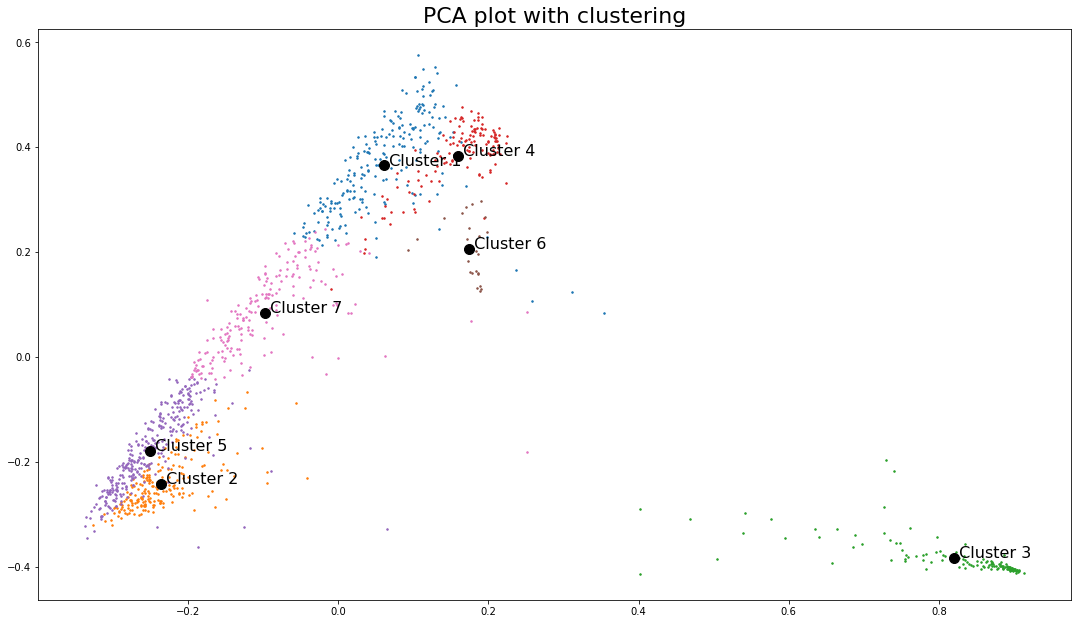

Cluster 1: מחל - 0.58, פה - 0.13, שס - 0.12, טב - 0.07, אמת - 0.03, 
Cluster 2: פה - 0.55, אמת - 0.31, מחל - 0.07, ל - 0.02, טב - 0.02, 
Cluster 3: ודעם - 0.91, פה - 0.03, אמת - 0.02, מחל - 0.01, ל - 0.01, 
Cluster 4: טב - 0.56, מחל - 0.27, פה - 0.06, ג - 0.04, שס - 0.03, 
Cluster 5: פה - 0.62, מחל - 0.16, אמת - 0.14, טב - 0.03, ל - 0.03, 
Cluster 6: ג - 0.54, שס - 0.22, מחל - 0.12, טב - 0.08, פה - 0.02, 
Cluster 7: פה - 0.38, מחל - 0.36, אמת - 0.08, טב - 0.06, ל - 0.05, 


In [32]:
K=7; 
kmeanModel = KMeans(n_clusters=K, max_iter=10000).fit(relative_votes)
kmeanModel.fit(relative_votes)

for k in range(0,K):
    plt.plot(X[kmeanModel.labels_==k,0],X[kmeanModel.labels_==k,1],'.',markersize=3)
    current_cluster_x=np.mean(X[kmeanModel.labels_==k,0])
    current_cluster_y=np.mean(X[kmeanModel.labels_==k,1])
    plt.plot(current_cluster_x,current_cluster_y,'ok',markersize=10)
    plt.text(current_cluster_x,current_cluster_y,r' Cluster '+str(k+1), fontsize=16)
plt.title('PCA plot with clustering', fontsize=22)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

cluster=[1]*K
for k in range(0,K):
    cluster[k]=tuple(zip(kmeanModel.cluster_centers_[k],party_titles))
    cluster[k]=sorted(cluster[k],reverse=True)
    print ('Cluster '+str(k+1)+':', end=' ')
    for i in range(0,5):
        print(cluster[k][i][1]+" - "+str(round(100*cluster[k][i][0])/100), end=', ')
    print()
    

[0.586563479176513, 0.5435739805443769, 0.5839839001326903, 0.5983101576304933]


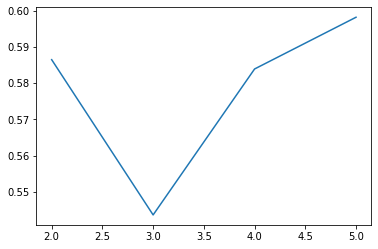

In [33]:
score = []
for i in np.arange(2, 6):
    kmeans = KMeans(n_clusters=i).fit(normalized_df)
    score.append(silhouette_score(normalized_df, kmeans.predict(normalized_df)))
print(score)
plt.plot(np.arange(2, 6), score)

In [34]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(normalized_df)

pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(normalized_df))
pca_df['label'] = kmeans.predict(normalized_df)
pca_df['locations'] = locations
pca_df['sizes'] = sizes

In [35]:
trace1 = go.Bar(
        x=normalized_df.columns,
        y=kmeans.cluster_centers_[0],
        name='Cluster 1'
        )

trace2 = go.Bar(
        x=normalized_df.columns,
        y=kmeans.cluster_centers_[1],
        name='Cluster 2'
        )

trace3 = go.Bar(
        x=normalized_df.columns,
        y=kmeans.cluster_centers_[2],
        name='Cluster 3'
        )

trace4 = go.Bar(
        x=normalized_df.columns,
        y=kmeans.cluster_centers_[3],
        name='Cluster 4'
        )

trace5 = go.Bar(
        x=normalized_df.columns,
        y=kmeans.cluster_centers_[4],
        name='Cluster 5'
        )

layout = go.Layout(
     title='<b>Cluster Centers</b>',
     titlefont=dict(size = 30, color='#7f7f7f'),
     hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)
py.iplot(fig)

In [36]:
traces = []

for label in sorted(pca_df.label.unique()):
    traces.append(go.Scatter(
            x=pca_df[pca_df.label == label][0],
            y=pca_df[pca_df.label == label][1],
            text=pca_df[pca_df.label == label]['locations'],
            mode='markers',
            hoverinfo='text',
            marker=dict(
                size=[np.sqrt(a)/5 for a in (pca_df[pca_df.label == label]['sizes'])],
                opacity=0.3,
          )
           )
                     )
    
layout = go.Layout(
        width=1100,
        height=900,
        title= 'Likud voting clusters',
        hovermode='closest',
        xaxis=dict(
            autorange=True,
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            showticklabels=False
        ),
        yaxis=dict(
            autorange=True,
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            showticklabels=False
        ))
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [37]:
df

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
0,18,אבו גווייעד שבט,967,2018,595,6,589,13,0,554,...,0,8,2,0,0,0,0,2,2,NaN
1,2,אבו גוש,472,4821,2718,36,2682,75,4,2157,...,2,123,0,2,0,0,1,4,14,NaN
2,6,אבו סנאן,473,9422,6090,53,6037,92,6,4458,...,3,752,0,2,2,1,2,4,247,NaN
3,18,אבו עבדון שבט,958,142,41,1,40,0,0,40,...,0,0,0,0,0,0,0,0,0,NaN
4,18,אבו קורינאת שבט,968,3037,1336,8,1328,9,0,1263,...,0,33,0,2,1,0,2,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,18,תקומה,665,488,416,2,414,5,5,0,...,1,63,0,0,0,0,0,0,12,NaN
1210,2,תקוע,3563,2158,1619,4,1615,28,33,3,...,0,85,2,0,1,0,2,5,34,NaN
1211,18,תראבין אצאנע שבט,970,520,48,0,48,0,0,43,...,0,4,0,0,0,0,0,0,0,NaN
1212,18,תראבין אצאנעישוב,1346,587,206,0,206,0,0,160,...,0,2,1,0,1,0,0,0,0,NaN


In [38]:
bycode

,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות
0,שחר,7,SHAHAR,6,61,612.0,50.0,NaN,1.0,875.0,...,1955,310,1.0,1.739861e+09,83.0,634.0,10001813.0,2018,Shahar,NaN
1,תירוש,10,TIROSH,1,11,112.0,26.0,NaN,1.0,501.0,...,1955,310,2.0,1.892863e+09,130.0,151.0,15000597.0,2018,Tirosh,NaN
2,"ניר ח""ן",11,NIR HEN,6,61,612.0,50.0,NaN,1.0,552.0,...,1955,310,1.0,1.729761e+09,91.0,634.0,10001813.0,2018,Nir Hen,NaN
3,חצבה,13,HAZEVA,6,62,625.0,54.0,NaN,1.0,605.0,...,1965,310,1.0,2.266752e+09,-160.0,657.0,10001918.0,2018,Hazeva,610.0
4,נועם,15,NO'AM,6,61,612.0,34.0,NaN,1.0,349.0,...,1955,310,2.0,1.799961e+09,148.0,631.0,10001813.0,2018,No'am,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,יהוד,9400,YEHUD,4,42,422.0,0.0,132.0,1.0,29930.0,...,1948,160,NaN,1.893966e+09,30.0,411.0,10001516.0,2018,Yehud,NaN
1478,קריית ביאליק,9500,QIRYAT BIALIK,3,31,311.0,0.0,221.0,1.0,39927.0,...,1934,160,NaN,2.087275e+09,7.0,352.0,10004207.0,2018,Qiryat Bialik,310.0
1479,קריית ים,9600,QIRYAT YAM,3,31,311.0,0.0,221.0,1.0,39909.0,...,1941,160,NaN,2.070575e+09,0.0,352.0,10004207.0,2018,Qiryat Yam,310.0
1480,הוד השרון,9700,HOD HASHARON,4,42,421.0,0.0,131.0,1.0,62325.0,...,1924,150,NaN,1.901767e+09,10.0,423.0,10002133.0,2018,Hod HaSharon,NaN


In [39]:
import folium
from pyproj import Proj, transform
import mgrs

In [40]:
bycode = pd.read_excel("data\\bycode2018.xlsx", header=0)
bycode_new = pd.read_csv(r'data/new.csv', encoding='utf-8')

coord = bycode_new[['SettlementCode', 'X_GEO', 'Y_GEO']].copy()
joined = pd.merge(bycode, coord,  how='left', left_on=['סמל יישוב'], right_on = ['SettlementCode'])
joined = joined[joined['X_GEO'].notna()]
joined = joined[joined['Y_GEO'].notna()]
joined


,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,...,קואורדינטות,גובה,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות,SettlementCode,X_GEO,Y_GEO
0,שחר,7,SHAHAR,6,61,612.0,50.0,NaN,1.0,875.0,...,1.739861e+09,83.0,634.0,10001813.0,2018,Shahar,NaN,7.0,34.725148,31.619620
1,תירוש,10,TIROSH,1,11,112.0,26.0,NaN,1.0,501.0,...,1.892863e+09,130.0,151.0,15000597.0,2018,Tirosh,NaN,10.0,34.885951,31.750709
2,"ניר ח""ן",11,NIR HEN,6,61,612.0,50.0,NaN,1.0,552.0,...,1.729761e+09,91.0,634.0,10001813.0,2018,Nir Hen,NaN,11.0,34.714666,31.608758
3,חצבה,13,HAZEVA,6,62,625.0,54.0,NaN,1.0,605.0,...,2.266752e+09,-160.0,657.0,10001918.0,2018,Hazeva,610.0,13.0,35.279786,30.767999
4,נועם,15,NO'AM,6,61,612.0,34.0,NaN,1.0,349.0,...,1.799961e+09,148.0,631.0,10001813.0,2018,No'am,NaN,15.0,34.788718,31.568076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,זכרון יעקב,9300,ZIKHRON YA'AQOV,3,32,322.0,99.0,NaN,1.0,23075.0,...,1.957872e+09,7.0,353.0,10004333.0,2018,Zikhron Ya'aqov,NaN,9300.0,34.952200,32.570578
1477,יהוד,9400,YEHUD,4,42,422.0,0.0,132.0,1.0,29930.0,...,1.893966e+09,30.0,411.0,10001516.0,2018,Yehud,NaN,9400.0,34.886249,32.032979
1478,קריית ביאליק,9500,QIRYAT BIALIK,3,31,311.0,0.0,221.0,1.0,39927.0,...,2.087275e+09,7.0,352.0,10004207.0,2018,Qiryat Bialik,310.0,9500.0,35.089763,32.838767
1479,קריית ים,9600,QIRYAT YAM,3,31,311.0,0.0,221.0,1.0,39909.0,...,2.070575e+09,0.0,352.0,10004207.0,2018,Qiryat Yam,310.0,9600.0,35.071804,32.848667


In [41]:
joined.loc[joined['סמל יישוב'] == 3000]

,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,...,קואורדינטות,גובה,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות,SettlementCode,X_GEO,Y_GEO
1276,ירושלים,3000,JERUSALEM,1,11,111.0,0.0,410.0,4.0,919438.0,...,2.209463e+09,419.0,101.0,10002489.0,2018,Jerusalem,NaN,3000.0,35.219257,31.782581


In [43]:
pca_df

,0,1,label,locations,sizes,lat,lng
0,0.855451,-0.391363,2,אבו גווייעד שבט,595,31.619620,34.725148
1,0.727320,-0.285637,2,אבו גוש,2718,31.750709,34.885951
2,0.635040,-0.329065,2,אבו סנאן,6090,31.608758,34.714666
3,0.912993,-0.412116,2,אבו עבדון שבט,41,30.767999,35.279786
4,0.859238,-0.399048,2,אבו קורינאת שבט,1336,31.568076,34.788718
...,...,...,...,...,...,...,...
1046,0.176268,0.469757,4,קרית נטפים,362,31.372811,34.481698
1210,0.148620,0.406417,4,תקוע,1619,31.955364,35.247844
1211,0.782810,-0.404246,2,תראבין אצאנע שבט,48,32.305306,34.962599
1212,0.729863,-0.197040,2,תראבין אצאנעישוב,206,32.445827,34.977538


In [42]:
# if we have logitude and latitde we could do map thingy

pca_df['lat'] = joined.Y_GEO
pca_df['lng'] = joined.X_GEO
pca_df = pca_df[pca_df['lat'].notna()]
pca_df = pca_df[pca_df['lng'].notna()]

m = folium.Map(location=[32.13,34.8],zoom_start=9, tiles="CartoDB dark_matter" )

colors = ['blue', 'orange', 'green', 'crimson', 'purple']
for row in pca_df.iterrows():
    folium.Circle(
              location= (row[1].lat, row[1].lng),    
              radius=0.03*row[1].sizes,
              popup= '<b>' + str(row[1].locations),
              color=colors[row[1].label],
              fill=True,
              fill_color=colors[row[1].label]
        ).add_to(m)
    
m

In [47]:
# if we have logitude and latitde we could do map thingy

pca_df['lat'] = joined.Y_GEO
pca_df['lng'] = joined.X_GEO
pca_df = pca_df[pca_df['lat'].notna()]
pca_df = pca_df[pca_df['lng'].notna()]

m = folium.Map(location=[32.13,34.8],zoom_start=9, tiles="CartoDB dark_matter" )

colors = ['blue', 'orange', 'green', 'crimson', 'purple']
folium.Circle(
          location= (31.782581, 35.219257),    
          radius=10,
          #popup= '<b>' + str(row[1].locations),
          #color=colors[row[1].label],
          fill=True,
          fill_color='orange'
    ).add_to(m)
    
m